In [183]:
from constants import POMS_MLM_DATA_DIR, POMS_GENDER_DATA_DIR, POMS_RACE_DATA_DIR, SENTIMENT_MLM_PRETRAIN_DATA_DIR, SENTIMENT_IMA_PRETRAIN_DATA_DIR, SENTIMENT_TOPICS_PRETRAIN_MLM_DIR, SENTIMENT_TOPICS_PRETRAIN_ITX_DIR
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [184]:
GENDER_LOSSES = f"{POMS_GENDER_DATA_DIR}/model_enriched_noisy/losses.csv"
RACE_LOSSES = f"{POMS_RACE_DATA_DIR}/model_enriched_noisy/losses.csv"
TOPICS_LOSSES = f"{SENTIMENT_TOPICS_PRETRAIN_ITX_DIR}/books/model/losses.csv"
IMA_LOSSES = f"{SENTIMENT_IMA_PRETRAIN_DATA_DIR}/double_num_adj/unified/model/losses.csv"
IMA_CONTROL_LOSSES = f"{SENTIMENT_IMA_PRETRAIN_DATA_DIR}/double_num_adj/unified/model_control/losses.csv"

In [185]:
def plot_losses(losses_file, loss_columns, title, agg_f=None):
    df = pd.read_csv(losses_file, usecols=["epoch"]+loss_columns)
    if agg_f:
        df_agg = df.groupby("epoch").agg(agg_f)
        plt.xlabel("epoch")
        plt.title(f"{title} {agg_f} loss")
    else:
        df_agg = df
        plt.xlabel("sample")
        plt.title(f"{title} loss")
    for col in loss_columns:
        plt.plot(df_agg[col], label=col.split('_')[0])
    plt.ylabel("loss")
    plt.legend(bbox_to_anchor=(1.3,1), loc='upper right')
    print(df_agg.head())
    plt.show()

   epoch  mlm_loss  adversarial_loss
0      0  1.247934          0.786587
1      0  0.016645          0.755126
2      0  4.978067          0.595261
3      0  3.568889          0.755302
4      0  5.422104          0.739808


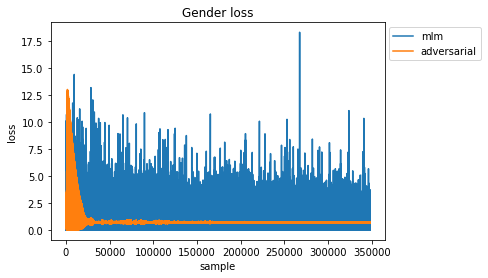

       mlm_loss  adversarial_loss
epoch                            
0      0.438217          1.468326
1      0.324248          0.719994
2      0.305631          0.713472
3      0.296616          0.706028
4      0.287010          0.697611


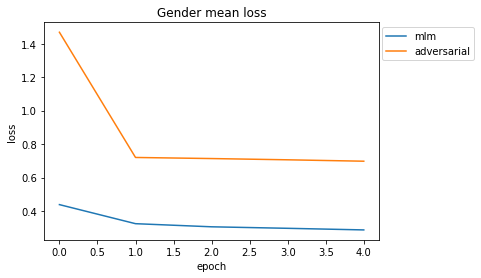

       mlm_loss  adversarial_loss
epoch                            
0      0.004487          0.731764
1      0.000369          0.713500
2      0.000145          0.716962
3      0.000075          0.712141
4      0.000036          0.701693


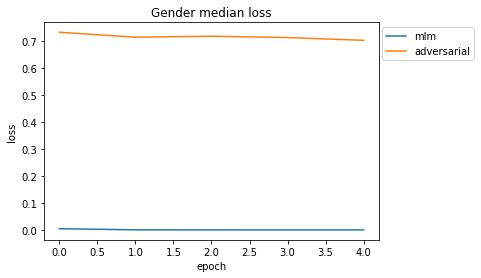

        mlm_loss  adversarial_loss
epoch                             
0      14.412342         13.020673
1      10.869379          0.942675
2      10.748077          0.838699
3      18.324234          0.767478
4      11.059266          0.744436


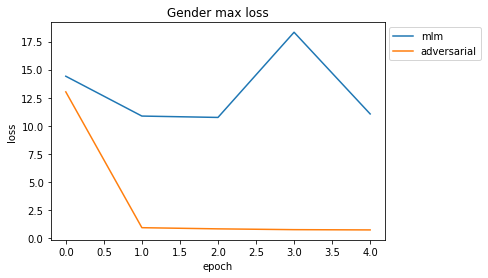

In [186]:
for agg_f in (None, "mean", "median", "max"):
    plot_losses(GENDER_LOSSES, ["mlm_loss", "adversarial_loss"], "Gender", agg_f)

   epoch  mlm_loss  adversarial_loss
0      0  0.638901          0.811592
1      0  3.718647          0.895326
2      0  2.144917          0.648862
3      0  4.696706          0.809199
4      0  4.265535          0.614245


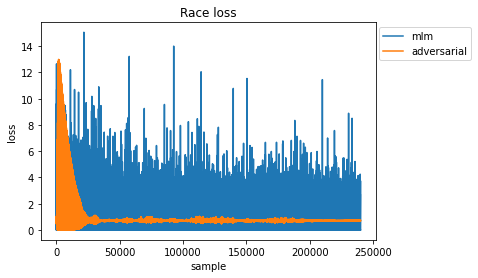

       mlm_loss  adversarial_loss
epoch                            
0      0.470604          1.810505
1      0.320226          0.723937
2      0.306009          0.721578
3      0.292738          0.706073
4      0.283281          0.695965


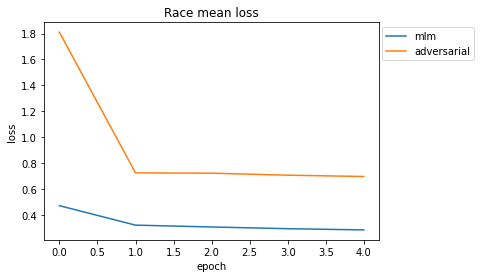

       mlm_loss  adversarial_loss
epoch                            
0      0.007600          0.742001
1      0.000505          0.712420
2      0.000238          0.703174
3      0.000118          0.695961
4      0.000029          0.695986


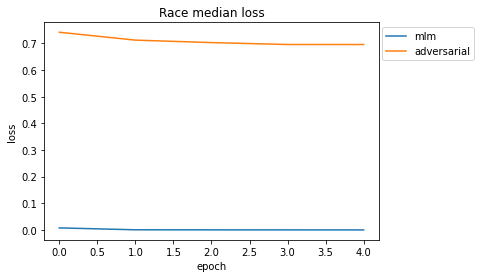

        mlm_loss  adversarial_loss
epoch                             
0      15.064797         12.999005
1      14.006729          1.012510
2      12.051052          1.032559
3      11.541416          0.937995
4      11.453393          0.805650


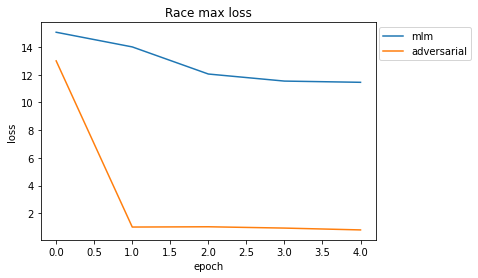

In [187]:
for agg_f in (None, "mean", "median", "max"):
    plot_losses(RACE_LOSSES, ["mlm_loss", "adversarial_loss"], "Race", agg_f)

   epoch  mlm_loss  adversarial_loss
0      0  2.259480          0.716407
1      0  4.485468          0.709265
2      0  5.091022          0.698600
3      0  4.381588          0.689214
4      0  3.719161          0.687032


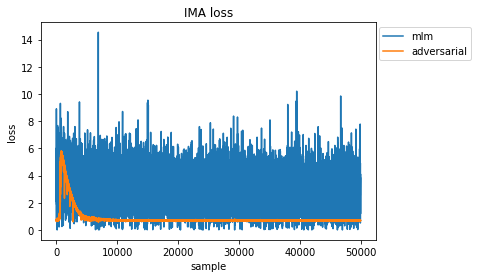

       mlm_loss  adversarial_loss
epoch                            
0      3.514353          1.550732
1      3.132260          0.690645
2      2.981228          0.690311
3      2.876917          0.694996
4      2.813266          0.693503


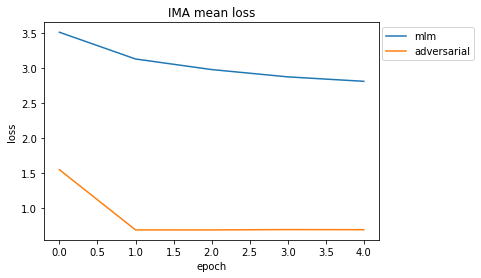

       mlm_loss  adversarial_loss
epoch                            
0      3.494959          0.826856
1      3.122647          0.689742
2      2.973703          0.689949
3      2.862933          0.694660
4      2.798422          0.693425


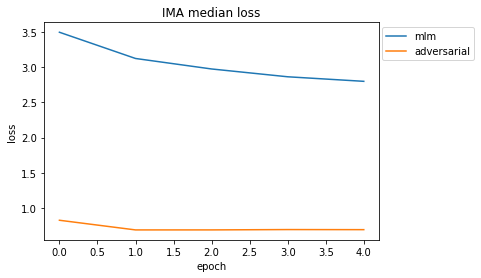

        mlm_loss  adversarial_loss
epoch                             
0      14.541634          5.803323
1       9.544083          0.764352
2       8.374561          0.808934
3      10.204749          0.764418
4       9.851170          0.758486


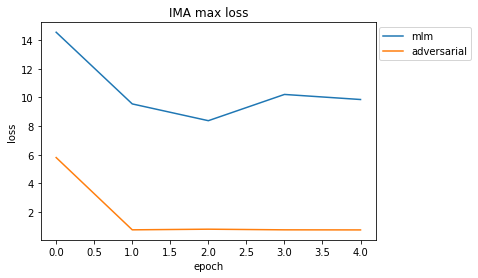

In [188]:
for agg_f in (None, "mean", "median", "max"):
    plot_losses(IMA_LOSSES, ["mlm_loss", "adversarial_loss"], "IMA", agg_f)

   epoch  mlm_loss  adversarial_loss  control_loss
0      0  3.466857          0.718117      2.860972
1      0  4.318099          0.695479      2.960293
2      0  3.039507          0.725377      2.924875
3      0  5.846610          0.766225      2.891886
4      0  5.096047          0.691951      2.925409


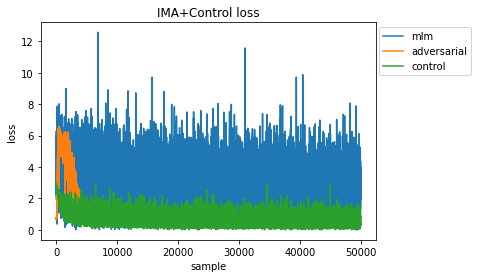

       mlm_loss  adversarial_loss  control_loss
epoch                                          
0      3.660699          2.071334      0.894035
1      3.196343          0.682978      0.565145
2      3.046947          0.693379      0.508680
3      2.946198          0.690770      0.480156
4      2.880793          0.688960      0.467267


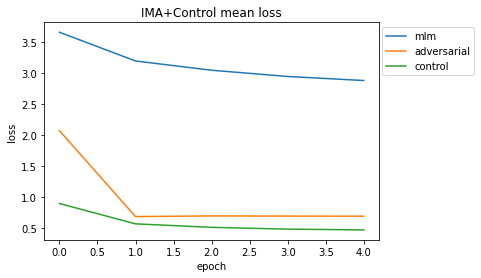

       mlm_loss  adversarial_loss  control_loss
epoch                                          
0      3.632852          1.001034      0.767353
1      3.185328          0.683040      0.524005
2      3.040705          0.692747      0.468698
3      2.931719          0.690307      0.439926
4      2.874390          0.688706      0.428897


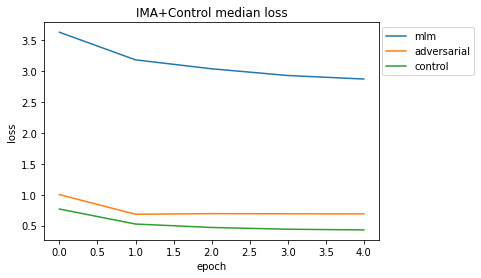

        mlm_loss  adversarial_loss  control_loss
epoch                                           
0      12.580643          6.605282      2.975026
1       9.714514          0.776644      2.364844
2       8.035483          0.827141      2.531840
3      11.576611          0.820038      2.941881
4       9.885197          0.812899      2.923229


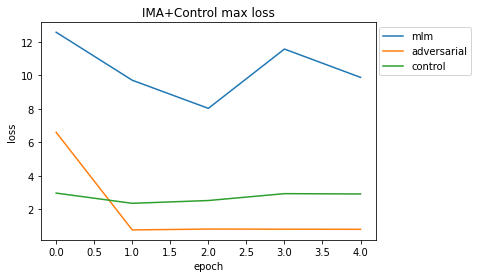

In [189]:
for agg_f in (None, "mean", "median", "max"):
    plot_losses(IMA_CONTROL_LOSSES, ["mlm_loss", "adversarial_loss", "control_loss"], "IMA+Control", agg_f)

   epoch  mlm_loss  treatment_loss  control_loss
0      0  2.436239        0.706493      0.787160
1      0  1.727641        0.668718      0.719295
2      0  2.348659        0.607078      0.693675
3      0  2.131369        0.706294      0.693640
4      0  1.136898        0.628999      0.628275


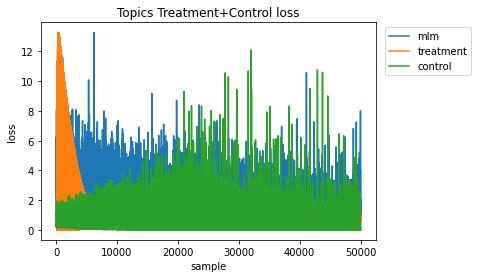

       mlm_loss  treatment_loss  control_loss
epoch                                        
0      2.461346        3.108747      0.396307
1      1.869818        0.630578      0.293904
2      1.561728        0.659533      0.229635
3      1.346610        0.646305      0.147939
4      1.209585        0.643334      0.091952


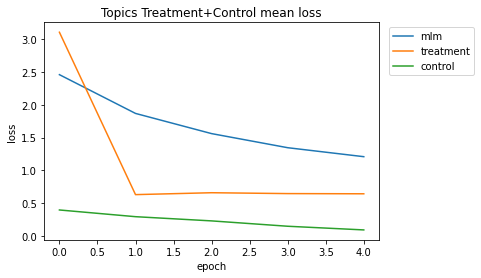

       mlm_loss  treatment_loss  control_loss
epoch                                        
0      2.310558        1.159238      0.198461
1      1.765336        0.514308      0.085703
2      1.461202        0.527752      0.056570
3      1.242601        0.544588      0.027980
4      1.098370        0.544066      0.017361


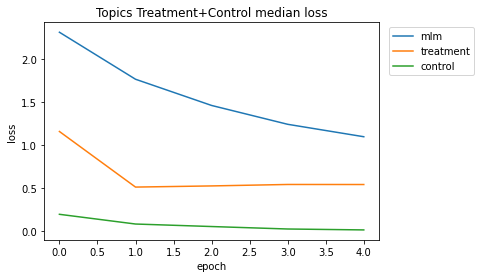

        mlm_loss  treatment_loss  control_loss
epoch                                         
0      13.263835       13.291361      3.396371
1       9.184827        1.775110      6.066952
2       8.411183        1.965448     10.561077
3       7.474141        1.447412     12.101108
4      10.573826        1.354668     10.760489


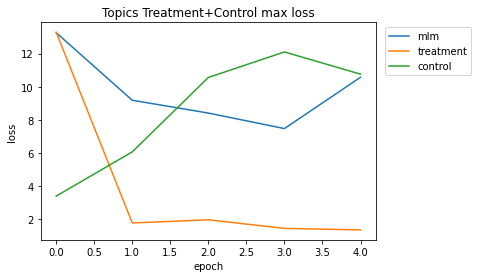

In [190]:
for agg_f in (None, "mean", "median", "max"):
    plot_losses(TOPICS_LOSSES, ["mlm_loss", "treatment_loss", "control_loss"], "Topics Treatment+Control", agg_f)